# Tiny ImageNet

## Imports

In [1]:
import sys 
import numpy as np 
import matplotlib.pyplot as plt


import torch
import torchvision 
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

sys.path.insert(0, '../src_code')

import models
from train import *
from metrics import * 

print("Python: %s" % sys.version)
print("Pytorch: %s" % torch.__version__)

# determine device to run network on (runs on gpu if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Python: 3.6.5 (default, Jun 21 2018, 23:07:39) 
[GCC 5.4.0 20160609]
Pytorch: 0.4.0


## Hyperparameters

In [2]:
n_epochs = 50
batch_size = 128
lr = 0.001
k = 3


## Load Tiny ImageNet
### https://tiny-imagenet.herokuapp.com/

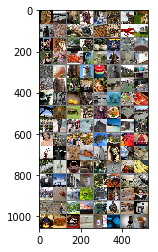

In [3]:
train_dir = "../datasets/tiny-imagenet-200/train"
test_dir = "../datasets/tiny-imagenet-200/val"


# Data augmentation 
train_transform = torchvision.transforms.Compose([
    #torchvision.transforms.RandomRotation(10),
    #torchvision.transforms.RandomHorizontalFlip(),
    #torchvision.transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
 
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = torchvision.transforms.Compose([
    #torchvision.transforms.Pad(2),
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
    



# load training set 
trainset = torchvision.datasets.ImageFolder(train_dir, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# load test set 
testset = torchvision.datasets.ImageFolder(test_dir, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# helper function to unnormalize and plot image 
def imshow(img):
    img = np.array(img)
    img = img / 2 + 0.5
    img = np.moveaxis(img, 0, -1)
    plt.imshow(img)
    
# display sample from dataset 
imgs,labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))  

## Train Model 

In [4]:
net = models.tiny_cnn(n_in=3, n_out=200, n_hidden=128, size=64).to(device)

net.apply(models.weights_init)

loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

In [5]:
train(net, trainloader, testloader, optimizer, loss, n_epochs, verbose=True)

[0/50][0/782] loss = 6.698481
[0/50][1/782] loss = 144.168533
[0/50][2/782] loss = 174.193344
[0/50][3/782] loss = 135.602676
[0/50][4/782] loss = 137.116547
[0/50][5/782] loss = 131.191391
[0/50][6/782] loss = 132.303329
[0/50][7/782] loss = 130.183792
[0/50][8/782] loss = 126.177017
[0/50][9/782] loss = 126.691406
[0/50][10/782] loss = 131.157471
[0/50][11/782] loss = 133.406464
[0/50][12/782] loss = 136.745041
[0/50][13/782] loss = 121.420853
[0/50][14/782] loss = 111.565590
[0/50][15/782] loss = 118.002953
[0/50][16/782] loss = 105.817627
[0/50][17/782] loss = 108.852745
[0/50][18/782] loss = 108.624908
[0/50][19/782] loss = 108.615662
[0/50][20/782] loss = 126.169739
[0/50][21/782] loss = 93.862854
[0/50][22/782] loss = 99.050499
[0/50][23/782] loss = 87.402611
[0/50][24/782] loss = 114.669434
[0/50][25/782] loss = 79.900391
[0/50][26/782] loss = 85.362930
[0/50][27/782] loss = 100.522667
[0/50][28/782] loss = 77.086121
[0/50][29/782] loss = 84.345634
[0/50][30/782] loss = 79.5763

[0/50][254/782] loss = 6.600268
[0/50][255/782] loss = 6.107468
[0/50][256/782] loss = 6.624236
[0/50][257/782] loss = 6.787032
[0/50][258/782] loss = 6.989296
[0/50][259/782] loss = 6.135749
[0/50][260/782] loss = 5.657454
[0/50][261/782] loss = 6.357224
[0/50][262/782] loss = 5.747816
[0/50][263/782] loss = 6.219139
[0/50][264/782] loss = 6.093335
[0/50][265/782] loss = 5.834603
[0/50][266/782] loss = 6.168294
[0/50][267/782] loss = 6.647079
[0/50][268/782] loss = 6.022344
[0/50][269/782] loss = 6.326577
[0/50][270/782] loss = 5.618995
[0/50][271/782] loss = 6.772457
[0/50][272/782] loss = 6.187476
[0/50][273/782] loss = 6.471000
[0/50][274/782] loss = 6.103060
[0/50][275/782] loss = 5.999282
[0/50][276/782] loss = 5.776331
[0/50][277/782] loss = 6.181663
[0/50][278/782] loss = 6.066334
[0/50][279/782] loss = 6.246574
[0/50][280/782] loss = 6.421340
[0/50][281/782] loss = 6.115138
[0/50][282/782] loss = 5.919209
[0/50][283/782] loss = 6.113731
[0/50][284/782] loss = 6.367281
[0/50][2

[0/50][511/782] loss = 5.463322
[0/50][512/782] loss = 5.137099
[0/50][513/782] loss = 4.813633
[0/50][514/782] loss = 5.073537
[0/50][515/782] loss = 5.337887
[0/50][516/782] loss = 5.268380
[0/50][517/782] loss = 4.873020
[0/50][518/782] loss = 5.634567
[0/50][519/782] loss = 5.367319
[0/50][520/782] loss = 5.002375
[0/50][521/782] loss = 5.028078
[0/50][522/782] loss = 5.290412
[0/50][523/782] loss = 5.210047
[0/50][524/782] loss = 4.809728
[0/50][525/782] loss = 5.170825
[0/50][526/782] loss = 5.350655
[0/50][527/782] loss = 5.347756
[0/50][528/782] loss = 5.367564
[0/50][529/782] loss = 5.395022
[0/50][530/782] loss = 5.131288
[0/50][531/782] loss = 5.034399
[0/50][532/782] loss = 5.113659
[0/50][533/782] loss = 5.729131
[0/50][534/782] loss = 4.992875
[0/50][535/782] loss = 5.088207
[0/50][536/782] loss = 5.656754
[0/50][537/782] loss = 5.229273
[0/50][538/782] loss = 5.068285
[0/50][539/782] loss = 5.271831
[0/50][540/782] loss = 5.946258
[0/50][541/782] loss = 5.272603
[0/50][5

[0/50][769/782] loss = 4.797629
[0/50][770/782] loss = 5.102867
[0/50][771/782] loss = 4.507827
[0/50][772/782] loss = 4.579538
[0/50][773/782] loss = 4.602200
[0/50][774/782] loss = 5.277125
[0/50][775/782] loss = 4.929676
[0/50][776/782] loss = 4.585898
[0/50][777/782] loss = 4.423406
[0/50][778/782] loss = 4.653981
[0/50][779/782] loss = 4.808920
[0/50][780/782] loss = 4.886179
[0/50][781/782] loss = 4.657498
[0/50]

Total accuracy = 0.82 %


[1/50][0/782] loss = 4.663586
[1/50][1/782] loss = 4.906825
[1/50][2/782] loss = 4.516499
[1/50][3/782] loss = 4.755831
[1/50][4/782] loss = 4.438923
[1/50][5/782] loss = 4.319094
[1/50][6/782] loss = 4.677760
[1/50][7/782] loss = 4.309331
[1/50][8/782] loss = 4.492985
[1/50][9/782] loss = 4.293761
[1/50][10/782] loss = 4.645653
[1/50][11/782] loss = 4.428074
[1/50][12/782] loss = 4.921365
[1/50][13/782] loss = 4.415045
[1/50][14/782] loss = 4.676085
[1/50][15/782] loss = 4.522556
[1/50][16/782] loss = 4.719520
[1/50][17/782] loss = 4.669943
[1

Process Process-7:


[1/50][32/782] loss = 4.241606
[1/50][33/782] loss = 4.315881


Process Process-8:
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 57, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 57, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/li

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-c02462513475>", line 1, in <module>
    train(net, trainloader, testloader, optimizer, loss, n_epochs, verbose=True)
  File "../src_code/train.py", line 16, in train
    for i, batch in enumerate(data_loader):
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 280, in __next__
    idx, batch = self._get_batch()
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 259, in _get_batch
    return self.data_queue.get()
  File "/usr/local/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/local/lib/python3.6/multiprocessing/connect

  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 57, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])


KeyboardInterrupt: 

  File "/usr/local/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 101, in __getitem__
    sample = self.loader(path)
  File "/usr/local/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 101, in __getitem__
    sample = self.loader(path)
  File "/usr/local/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 147, in default_loader
    return pil_loader(path)
  File "/usr/local/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 147, in default_loader
    return pil_loader(path)
  File "/usr/local/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 128, in pil_loader
    with open(path, 'rb') as f:
  File "/usr/local/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 128, in pil_loader
    with open(path, 'rb') as f:
KeyboardInterrupt
KeyboardInterrupt
